# Chicago Crime Data
Author: Kim Hazed Delfino

## Import

In [1]:
import os,glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [2]:
RAW_FILE = r'C:\Users\kdelfino\Documents\GitHub\Chicago_Crime_Data\Crimes_-_2001_to_Present.csv'

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.00,15.00,63.00,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.00,47.00,3.00,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,1824,18.00,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.00,23.00,56.00,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834338,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1411,14.00,35.00,21.00,14,"1,157,169.00","1,920,611.00",2023,07/05/2023 04:48:33 PM,41.94,-87.70,"(41.937925817, -87.697782474)"
7834339,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,1411,14.00,35.00,21.00,08B,NaN,NaN,2023,07/05/2023 04:48:33 PM,NaN,NaN,NaN
7834340,13129823,JG328250,06/28/2023 06:00:00 PM,059XX S KEELER AVE,0810,THEFT,OVER $500,STREET,False,False,813,8.00,13.00,65.00,06,NaN,NaN,2023,07/05/2023 04:48:33 PM,NaN,NaN,NaN
7834341,13128375,JG326564,06/24/2023 01:29:00 PM,069XX N HAMILTON AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE,False,False,2411,24.00,40.00,2.00,26,NaN,NaN,2023,07/05/2023 04:48:33 PM,NaN,NaN,NaN


In [3]:
# SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [4]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"

# Create Datetime column and set as index
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1323184,G017467,01/01/2001 01:00:00 PM,102XX S WOOD ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.00,NaN,NaN,26,"1,166,196.00","1,836,771.00",2001,08/17/2015 03:03:40 PM,41.71,-87.67,"(41.707671475, -87.666996186)"
2001-01-01 01:00:00,1328315,G020979,01/01/2001 01:00:00 AM,067XX S JUSTINE ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,NaN,11,"1,167,126.00","1,859,954.00",2001,08/17/2015 03:03:40 PM,41.77,-87.66,"(41.771269195, -87.662929135)"
2001-01-01 01:00:00,1311933,G002620,01/01/2001 01:00:00 AM,016XX N LEAVITT ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.00,NaN,NaN,17,"1,161,480.00","1,910,757.00",2001,08/17/2015 03:03:40 PM,41.91,-87.68,"(41.910796986, -87.682213687)"
2001-01-01 01:00:00,1330412,G026686,01/01/2001 01:00:00 AM,019XX N HALSTED ST,0820,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.00,NaN,NaN,06,"1,170,604.00","1,913,228.00",2001,08/17/2015 03:03:40 PM,41.92,-87.65,"(41.917382588, -87.648623098)"
2001-01-01 01:00:00,1311735,G000502,01/01/2001 01:00:00 AM,069XX W BELMONT AV,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.00,NaN,NaN,04B,"1,129,212.00","1,920,519.00",2001,08/17/2015 03:03:40 PM,41.94,-87.80,"(41.938196134, -87.800533735)"


In [5]:
# Check % of missing values
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Community Area         0.08
FBI Code               0.00
X Coordinate           0.01
Y Coordinate           0.01
Year                   0.00
Updated On             0.00
Latitude               0.01
Longitude              0.01
Location               0.01
dtype: float64

## Separate Full Dataset by Years

In [6]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(str)
chicago_full["Year"].value_counts()

2002    486804
2001    485885
2003    475983
2004    469421
2005    453772
2006    448177
2007    437087
2008    427169
2009    392824
2010    370501
2011    351971
2012    336273
2013    307474
2014    275740
2016    269805
2017    269091
2018    268802
2015    264773
2019    261284
2022    238652
2020    212160
2021    208689
2023    122006
Name: Year, dtype: int64

In [7]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [8]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.00,NaN,2001,41.71,-87.67
2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,2001,41.77,-87.66
2001-01-01 01:00:00,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.00,NaN,2001,41.91,-87.68
2001-01-01 01:00:00,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.00,NaN,2001,41.92,-87.65
2001-01-01 01:00:00,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.00,NaN,2001,41.94,-87.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 12:47:00,13122057,06/28/2023 12:47:00 AM,ROBBERY,ARMED - HANDGUN,CAR WASH,False,False,1221,12.00,36.00,2023,41.89,-87.68
2023-06-28 12:50:00,13122505,06/28/2023 12:50:00 PM,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,APARTMENT,False,False,1931,19.00,32.00,2023,41.93,-87.68
2023-06-28 12:50:00,13122064,06/28/2023 12:50:00 AM,ROBBERY,ARMED - HANDGUN,STREET,False,False,1135,11.00,28.00,2023,41.87,-87.69


In [9]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7834343 entries, 2001-01-01 01:00:00 to 2023-06-28 12:51:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 732.2+ MB


In [10]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [11]:
FINAL_DROP = ['Datetime','Year']

In [12]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[ year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [13]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [14]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



In [15]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.00,NaN,41.71,-87.67
1,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.00,NaN,41.77,-87.66
2,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.00,NaN,41.91,-87.68
3,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.00,NaN,41.92,-87.65
4,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.00,NaN,41.94,-87.80
...,...,...,...,...,...,...,...,...,...,...,...,...
122001,13122057,06/28/2023 12:47:00 AM,ROBBERY,ARMED - HANDGUN,CAR WASH,False,False,1221,12.00,36.00,41.89,-87.68
122002,13122505,06/28/2023 12:50:00 PM,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,APARTMENT,False,False,1931,19.00,32.00,41.93,-87.68
122003,13122064,06/28/2023 12:50:00 AM,ROBBERY,ARMED - HANDGUN,STREET,False,False,1135,11.00,28.00,41.87,-87.69
122004,13122624,06/28/2023 12:50:00 PM,ROBBERY,AGGRAVATED,SIDEWALK,False,False,513,5.00,9.00,41.69,-87.62


In [16]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485885
2002    486804
2003    475983
2004    469421
2005    453772
2006    448177
2007    437087
2008    427169
2009    392824
2010    370501
2011    351971
2012    336273
2013    307474
2014    275740
2015    264773
2016    269805
2017    269091
2018    268802
2019    261284
2020    212160
2021    208689
2022    238652
2023    122006
Name: Date, dtype: int64

## Task
- Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

- Stakeholder Questions to Answer (pick at least 3 topics) Select 3 or more of the following topics to analyze:
    - 1) Comparing Police Districts:
        - Which district has the most crimes? Which has the least?
    - 2) Crimes Across the Years:
        - Is the total number of crimes increasing or decreasing across the years?
        - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
    - 3) Comparing AM vs. PM Rush Hour:
        - Are crimes more common during AM rush hour or PM rush hour?
        - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
        - You can consider any crime that occurred between 4 -7 PM as PM rush hour.
        - What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
        - Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
    - 4) Comparing Months:
        - What months have the most crime? What months have the least?
        - Are there any individual crimes that do not follow this pattern? If so, which crimes?
    - 5) Comparing Holidays:
        - Are there any holidays that show an increase in the # of crimes?
        - Are there any holidays that show a decrease in the # of crimes?


### Answering Q1 - Which district has the most crimes? Which has the least?

In [17]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7834343 entries, 2001-01-01 01:00:00 to 2023-06-28 12:51:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 732.2+ MB


In [18]:
# Change District values from float to int
chicago_final['District']=chicago_final['District'].astype('Int64')

In [19]:
# Create a temp df for plot
plot_df = chicago_final[['ID','District']].copy().dropna()
plot_df

,ID,District
Datetime,,
2001-01-01 01:00:00,1323184,22
2001-01-01 01:00:00,1328315,7
2001-01-01 01:00:00,1311933,14
2001-01-01 01:00:00,1330412,18
2001-01-01 01:00:00,1311735,16
...,...,...
2023-06-28 12:47:00,13122057,12
2023-06-28 12:50:00,13122505,19
2023-06-28 12:50:00,13122064,11


In [20]:
# Get Crime rate count per district
plot_df['District'].value_counts()

8     526293
11    502542
6     458161
7     452550
25    445568
4     444761
3     397294
12    388577
9     382609
2     371075
19    352031
18    351635
5     347006
10    337561
15    335427
1     317262
14    302978
16    262389
22    256751
24    236828
17    226112
20    138637
31       245
21         4
Name: District, dtype: Int64

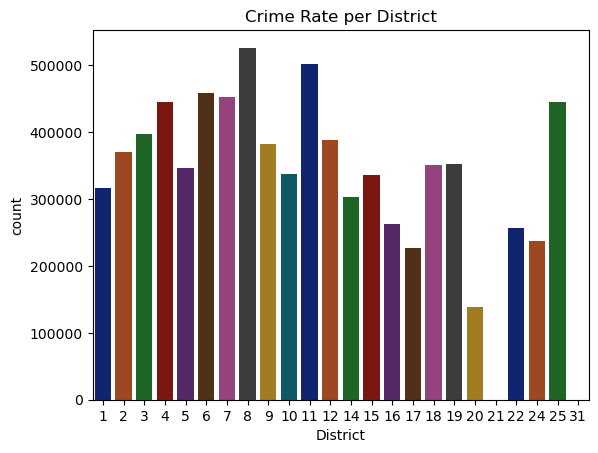

In [21]:
# Plot crime rate per district
ax = sns.countplot(data=plot_df,x='District',palette='dark')
ax.set_title('Crime Rate per District');


- Which district has the most crimes? Which has the least?
    - District that has the most crimes is `District 8` with total crimes of `526293`
    - District that has the least crimes is `District 21` with total crimes of `4`

### Answering Q2 -  Is the total number of crimes increasing or decreasing across the years?

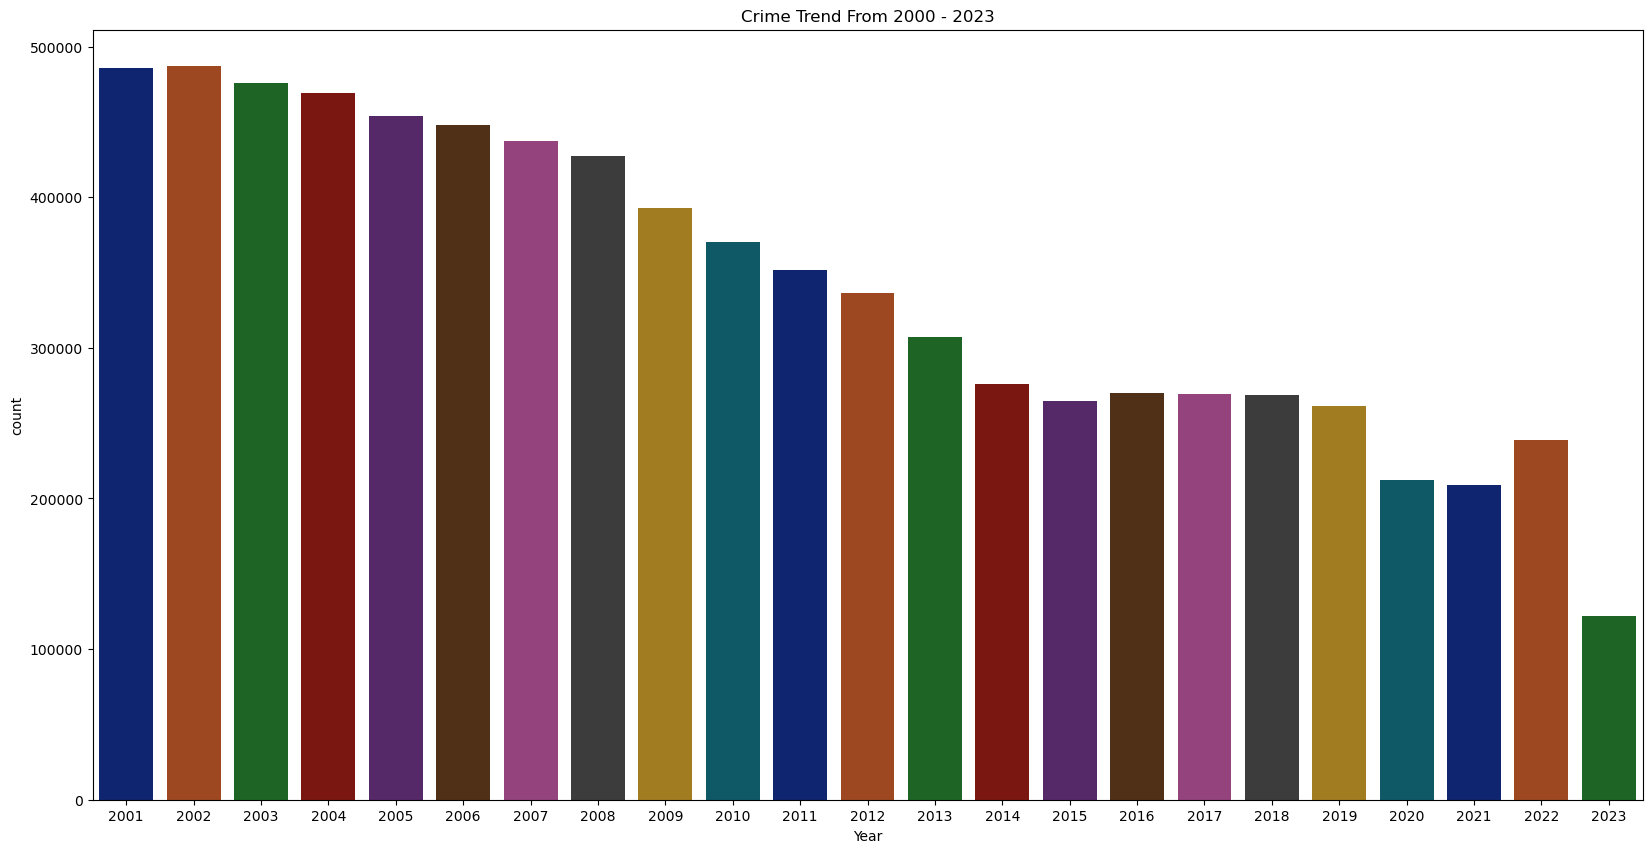

In [22]:
# Plot Crime rate by year
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data=chicago_final, x='Year',palette='dark')
ax.set_title('Crime Trend From 2000 - 2023');

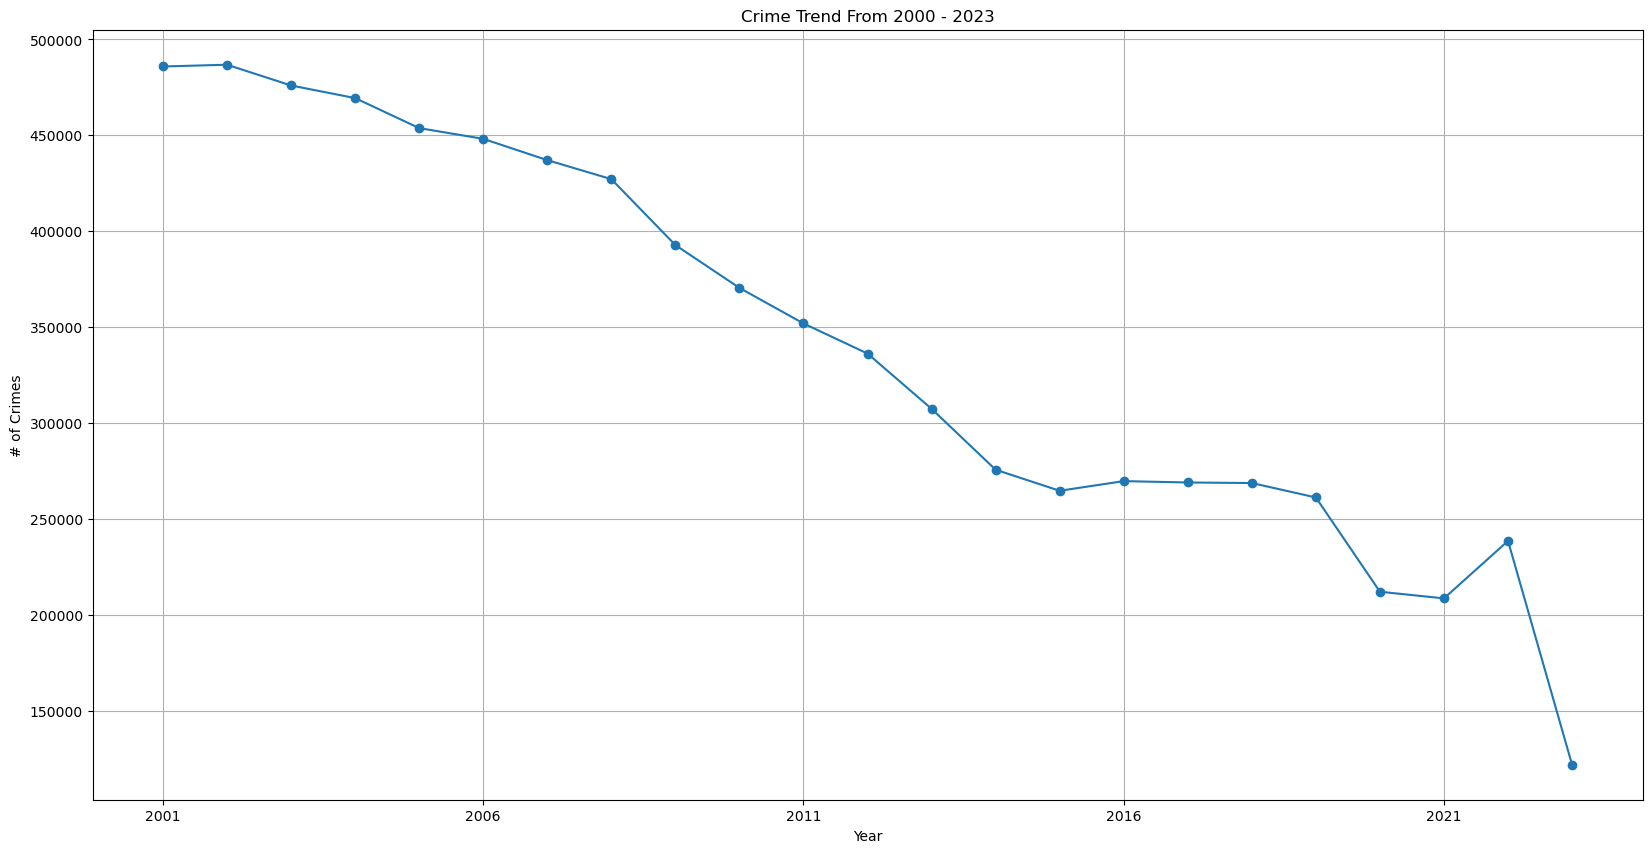

In [23]:
# Line plot
year_counts = chicago_final['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes',
                 xlabel='Year',figsize=(20,10),
                 title='Crime Trend From 2000 - 2023');

- Is the total number of crimes increasing or decreasing across the years?
    - Crime rate over the years has been `Decreasing`

### Answering Q3 - What months have the most crime? What months have the least?

In [32]:
df_temp = chicago_final.copy()

In [33]:
df_temp['Month'] = df_temp.index.month
df_temp['MonthName'] = df_temp.index.month_name()
df_temp.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,Month,MonthName
Datetime,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22,NaN,2001,41.71,-87.67,1,January
2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7,NaN,2001,41.77,-87.66,1,January
2001-01-01 01:00:00,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14,NaN,2001,41.91,-87.68,1,January


In [34]:
# saving lookup for number vs name
unique_months = df_temp.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

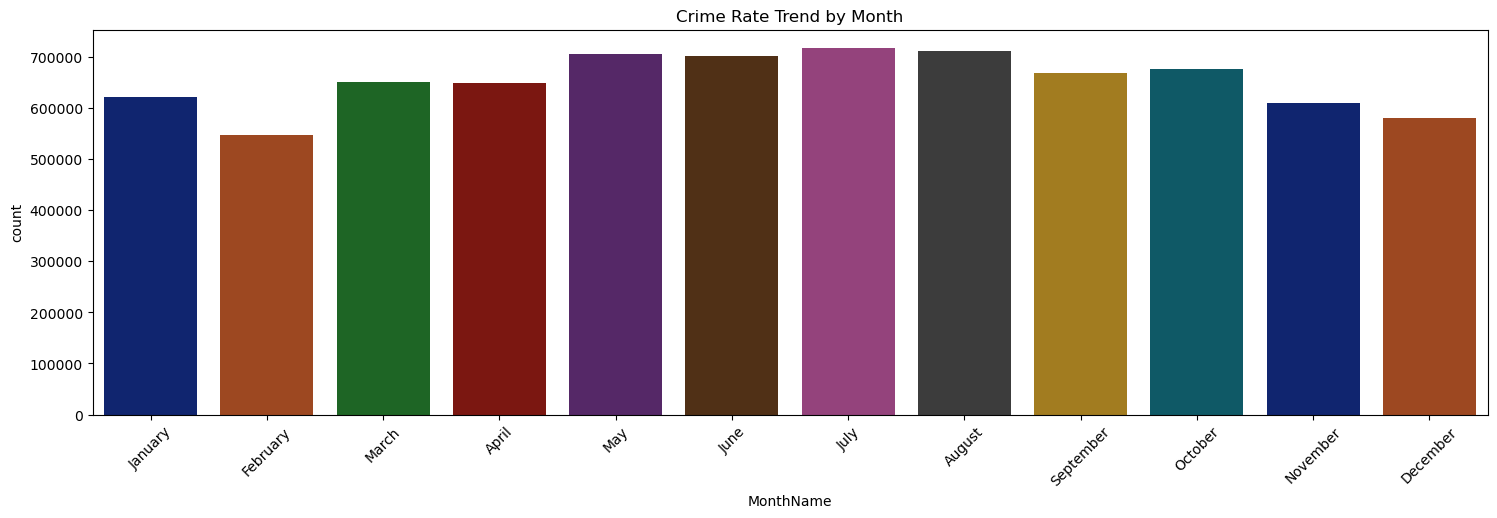

In [35]:
# Plot Crime Rate by Month 
fig, ax= plt.subplots(figsize=(18,5))
ax = sns.countplot(data=df_temp, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
ax.set_title('Crime Rate Trend by Month');

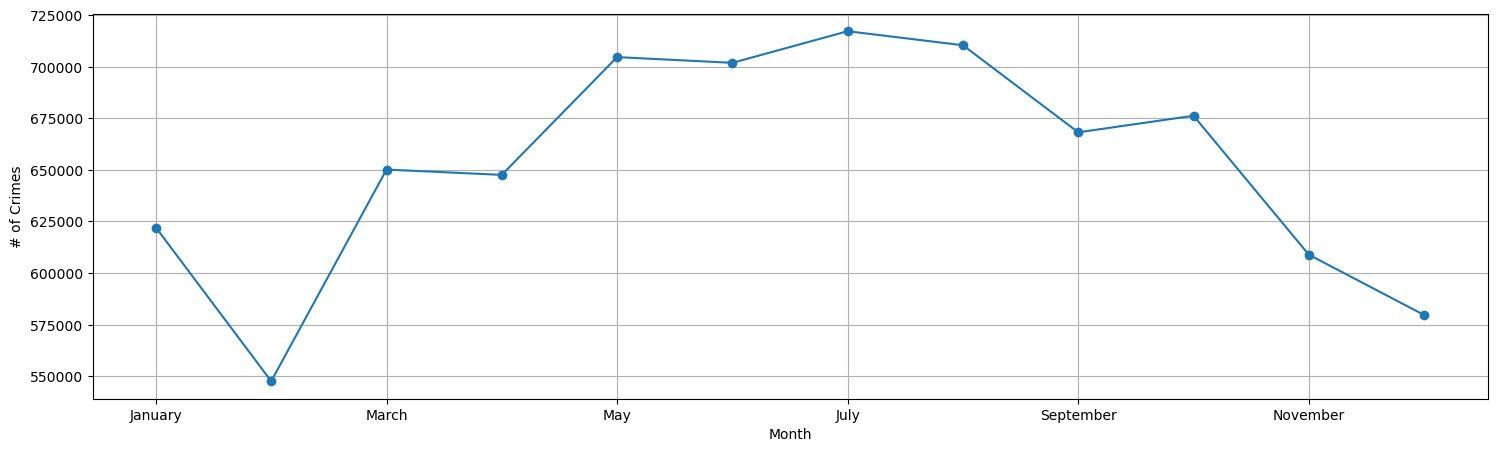

In [36]:
# save month counts
month_counts = df_temp['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
fig, ax = plt.subplots(figsize=(18,5))
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

- What months have the most crime? What months have the least?
    - The month that have the most crimes is the month of `July`
    - The month that have the least crimes is `Febuary`

####  Answering
- Q2.2 Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
- Q3.2 : Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [46]:
# Resample data to daily and get total count per day of crime
chicago_final.query('Description == "RECKLESS CONDUCT"').copy().resample('D').size()

Datetime
2001-01-01    2
2001-01-02    2
2001-01-03    3
2001-01-04    0
2001-01-05    1
             ..
2023-06-24    2
2023-06-25    4
2023-06-26    2
2023-06-27    2
2023-06-28    3
Freq: D, Length: 8214, dtype: int64

In [47]:
# Create dict to store all dates and count occurrences per crime
crimes = {}

In [48]:
# Iterate through df description and get occurrences of each crime
for crime in chicago_final['Description'].unique():
    # Query for the each crime and store instances as values and crime as key
    crimes[crime] = chicago_final.query(f'Description == "{crime}"').copy().resample('D').size().copy()
crimes.keys()

dict_keys(['HARASSMENT BY TELEPHONE', 'FRAUD OR CONFIDENCE GAME', 'CRIMINAL SEXUAL ABUSE', '$500 AND UNDER', 'AGGRAVATED: OTHER DANG WEAPON', 'ARSON THREAT', 'TO PROPERTY', 'TO VEHICLE', 'PREDATORY', 'SIMPLE', 'AUTOMOBILE', 'AGG SEX ASSLT OF CHILD FAM MBR', 'TELEPHONE THREAT', 'POSS: CANNABIS 30GMS OR LESS', 'FINANCIAL ID THEFT: OVER $300', 'ILLEGAL ILL LOTTERY', 'AGG: FINANCIAL ID THEFT', 'OVER $500', 'AGGRAVATED: HANDGUN', 'AGG CRIM SEX ABUSE FAM MEMBER', 'AGGRAVATED:KNIFE/CUTTING INSTR', 'UNLAWFUL POSS OF HANDGUN', 'FORCIBLE ENTRY', 'COUNTERFEITING DOCUMENT', 'ILLEGAL CONSUMPTION BY MINOR', 'OTHER VEHICLE OFFENSE', 'THEFT OF LABOR/SERVICES', 'ARMED: HANDGUN', 'POSS: CRACK', 'UNLAWFUL ENTRY', 'RECKLESS CONDUCT', 'POSS: CANNABIS MORE THAN 30GMS', 'LIQUOR LICENSE VIOLATION', 'SEX OFFENDER: FAIL REG NEW ADD', 'ATTEMPT: ARMED-OTHER FIREARM', 'ATTEMPT FORCIBLE ENTRY', 'NON-AGGRAVATED', 'UNLAWFUL USE HANDGUN', 'POSS: HEROIN(WHITE)', 'AGGRAVATED PO: OTHER DANG WEAP', 'UNLAWFUL POSS OTHER FI

In [49]:
# Double check values 
crimes['AGG RITUAL MUT:HANDGUN']

Datetime
2001-04-14    1
2001-04-15    0
2001-04-16    0
2001-04-17    0
2001-04-18    0
             ..
2006-12-12    0
2006-12-13    0
2006-12-14    0
2006-12-15    0
2006-12-16    1
Freq: D, Length: 2073, dtype: int64

In [50]:
# Convert dict into df and fill missing values with zero
crimes_df = pd.DataFrame(crimes).fillna(0)
crimes_df.sample(5)

,HARASSMENT BY TELEPHONE,FRAUD OR CONFIDENCE GAME,CRIMINAL SEXUAL ABUSE,$500 AND UNDER,AGGRAVATED: OTHER DANG WEAPON,ARSON THREAT,TO PROPERTY,TO VEHICLE,PREDATORY,SIMPLE,AUTOMOBILE,AGG SEX ASSLT OF CHILD FAM MBR,TELEPHONE THREAT,POSS: CANNABIS 30GMS OR LESS,FINANCIAL ID THEFT: OVER $300,ILLEGAL ILL LOTTERY,AGG: FINANCIAL ID THEFT,OVER $500,AGGRAVATED: HANDGUN,AGG CRIM SEX ABUSE FAM MEMBER,AGGRAVATED:KNIFE/CUTTING INSTR,UNLAWFUL POSS OF HANDGUN,FORCIBLE ENTRY,COUNTERFEITING DOCUMENT,ILLEGAL CONSUMPTION BY MINOR,OTHER VEHICLE OFFENSE,THEFT OF LABOR/SERVICES,ARMED: HANDGUN,POSS: CRACK,UNLAWFUL ENTRY,RECKLESS CONDUCT,POSS: CANNABIS MORE THAN 30GMS,LIQUOR LICENSE VIOLATION,SEX OFFENDER: FAIL REG NEW ADD,ATTEMPT: ARMED-OTHER FIREARM,ATTEMPT FORCIBLE ENTRY,NON-AGGRAVATED,UNLAWFUL USE HANDGUN,POSS: HEROIN(WHITE),AGGRAVATED PO: OTHER DANG WEAP,UNLAWFUL POSS OTHER FIREARM,AGGRAVATED VEHICULAR HIJACKING,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER CRIME INVOLVING PROPERTY,ENDANGERING LIFE/HEALTH CHILD,TO LAND,TO STATE SUP PROP,"THEFT/RECOVERY: TRUCK,BUS,MHOME",RESIST/OBSTRUCT/DISARM OFFICER,ARMED: OTHER DANGEROUS WEAPON,...,"AGGRAVATED POLICE OFFICER - HANDS, FISTS, FEET, NO INJURY",SOLICIT NARCOTICS ON PUBLIC WAY,MANUFACTURE / DELIVER - BARBITURATES,POSSESS - BARBITURATES,UNLAWFUL SALE - DELIVERY OF FIREARM AT SCHOOL,PROTECTED EMPLOYEE: HANDS NO / MIN INJURY,UNLAWFUL POSSESSION - AMMUNITION,AGGRAVATED: HANDS / FIST / FEET SERIOUS INJURY,FALSE / STOLEN / ALTERED TRP,AGGRAVATED PO: OTHER DANGEROUS WEAPON,GUN OFFENDER - DUTY TO REPORT CHANGE OF INFORMATION,POSSESS - PCP,GUN OFFENDER - DUTY TO REGISTER,VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS,UNLAWFUL USE / SALE OF AIR RIFLE,SALE OF TOBACCO PRODUCTS TO MINOR,MANUFACTURE / DELIVER - HEROIN (TAN / BROWN TAR),MANUFACTURE / DELIVER - HEROIN (BLACK TAR),AGGRAVATED PROTECTED EMPLOYEE - OTHER FIREARM,VIOLATION OF BAIL BOND - DOMESTIC VIOLENCE,SOLICITING FOR A PROSTITUTE,"THEFT BY LESSEE, NON-MOTOR VEHICLE",DEFACE IDENTIFICATION MARKS OF FIREARM,SOLICITING FOR BUSINESS,"ATTEMPT - TRUCK, BUS, MOTOR HOME",AGGRAVATED DOMESTIC BATTERY - OTHER FIREARM,POSSESS - HEROIN (BLACK TAR),OTHER ARSON / EXPLOSIVE INCIDENT,AGGRAVATED OF AN UNBORN CHILD,"ATTEMPT - CYCLE, SCOOTER, BIKE WITH VIN",POSSESSION - EXPLOSIVE / INCENDIARY DEVICE,MANUFACTURE / DELIVER - AMPHETAMINES,INTERFERE WITH EMERGENCY EQUIPMENT,UNLAWFUL SALE - HANDGUN,OF AN UNBORN CHILD,GAME / AMUSEMENT DEVICE,MANUFACTURE / DELIVER - METHAMPHETAMINE,MANUFACTURE / DELIVER - SYNTHETIC MARIJUANA,"AGG. RITUAL MUTILATION - HANDS, FISTS, FEET, SERIOUS INJURY",SELL / ADVERTISE FIREWORKS,"ATTEMPT - CYCLE, SCOOTER, BIKE NO VIN",DISCLOSE DOMESTIC VIOLENCE VICTIM LOCATION,DELIVER CANNABIS TO PERSON UNDER 18,SECOND DEGREE MURDER,POSSESS - HYPODERMIC NEEDLE,"THEFT / RECOVERY - CYCLE, SCOOTER, BIKE NO VIN",POSSESS KEYS OR DEVICE TO COIN MACHINE,DELIVER CONTROLLED SUBSTANCES TO PERSON UNDER 18,SEX OFFENDER - PROHIBITED ZONE,POSSESS - LOOK-ALIKE DRUGS
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-12-31,3,0.00,0,55,6.00,1.00,28,14,0.00,36,22,2.00,9,14.00,7.00,0.00,0.00,33,4.00,1.00,9.00,8.00,28,0,0.00,3,2.00,16.00,1.00,13,3,0.00,2.00,0.00,0.00,1,2,1.00,4.00,0.00,0.00,2,7,0.00,1.00,8,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-07-18,5,5.00,1,48,0.00,0.00,51,31,0.00,83,35,0.00,1,0.00,0.00,0.00,0.00,28,0.00,0.00,0.00,0.00,11,0,0.00,4,0.00,0.00,0.00,8,1,0.00,0.00,0.00,0.00,2,6,0.00,0.00,0.00,0.00,4,11,3.00,0.00,4,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [51]:
# Resample by year and get total crimes per year
crimes_df_year = crimes_df.copy().resample('A').sum()
crimes_df_year.head()

,HARASSMENT BY TELEPHONE,FRAUD OR CONFIDENCE GAME,CRIMINAL SEXUAL ABUSE,$500 AND UNDER,AGGRAVATED: OTHER DANG WEAPON,ARSON THREAT,TO PROPERTY,TO VEHICLE,PREDATORY,SIMPLE,AUTOMOBILE,AGG SEX ASSLT OF CHILD FAM MBR,TELEPHONE THREAT,POSS: CANNABIS 30GMS OR LESS,FINANCIAL ID THEFT: OVER $300,ILLEGAL ILL LOTTERY,AGG: FINANCIAL ID THEFT,OVER $500,AGGRAVATED: HANDGUN,AGG CRIM SEX ABUSE FAM MEMBER,AGGRAVATED:KNIFE/CUTTING INSTR,UNLAWFUL POSS OF HANDGUN,FORCIBLE ENTRY,COUNTERFEITING DOCUMENT,ILLEGAL CONSUMPTION BY MINOR,OTHER VEHICLE OFFENSE,THEFT OF LABOR/SERVICES,ARMED: HANDGUN,POSS: CRACK,UNLAWFUL ENTRY,RECKLESS CONDUCT,POSS: CANNABIS MORE THAN 30GMS,LIQUOR LICENSE VIOLATION,SEX OFFENDER: FAIL REG NEW ADD,ATTEMPT: ARMED-OTHER FIREARM,ATTEMPT FORCIBLE ENTRY,NON-AGGRAVATED,UNLAWFUL USE HANDGUN,POSS: HEROIN(WHITE),AGGRAVATED PO: OTHER DANG WEAP,UNLAWFUL POSS OTHER FIREARM,AGGRAVATED VEHICULAR HIJACKING,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER CRIME INVOLVING PROPERTY,ENDANGERING LIFE/HEALTH CHILD,TO LAND,TO STATE SUP PROP,"THEFT/RECOVERY: TRUCK,BUS,MHOME",RESIST/OBSTRUCT/DISARM OFFICER,ARMED: OTHER DANGEROUS WEAPON,...,"AGGRAVATED POLICE OFFICER - HANDS, FISTS, FEET, NO INJURY",SOLICIT NARCOTICS ON PUBLIC WAY,MANUFACTURE / DELIVER - BARBITURATES,POSSESS - BARBITURATES,UNLAWFUL SALE - DELIVERY OF FIREARM AT SCHOOL,PROTECTED EMPLOYEE: HANDS NO / MIN INJURY,UNLAWFUL POSSESSION - AMMUNITION,AGGRAVATED: HANDS / FIST / FEET SERIOUS INJURY,FALSE / STOLEN / ALTERED TRP,AGGRAVATED PO: OTHER DANGEROUS WEAPON,GUN OFFENDER - DUTY TO REPORT CHANGE OF INFORMATION,POSSESS - PCP,GUN OFFENDER - DUTY TO REGISTER,VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS,UNLAWFUL USE / SALE OF AIR RIFLE,SALE OF TOBACCO PRODUCTS TO MINOR,MANUFACTURE / DELIVER - HEROIN (TAN / BROWN TAR),MANUFACTURE / DELIVER - HEROIN (BLACK TAR),AGGRAVATED PROTECTED EMPLOYEE - OTHER FIREARM,VIOLATION OF BAIL BOND - DOMESTIC VIOLENCE,SOLICITING FOR A PROSTITUTE,"THEFT BY LESSEE, NON-MOTOR VEHICLE",DEFACE IDENTIFICATION MARKS OF FIREARM,SOLICITING FOR BUSINESS,"ATTEMPT - TRUCK, BUS, MOTOR HOME",AGGRAVATED DOMESTIC BATTERY - OTHER FIREARM,POSSESS - HEROIN (BLACK TAR),OTHER ARSON / EXPLOSIVE INCIDENT,AGGRAVATED OF AN UNBORN CHILD,"ATTEMPT - CYCLE, SCOOTER, BIKE WITH VIN",POSSESSION - EXPLOSIVE / INCENDIARY DEVICE,MANUFACTURE / DELIVER - AMPHETAMINES,INTERFERE WITH EMERGENCY EQUIPMENT,UNLAWFUL SALE - HANDGUN,OF AN UNBORN CHILD,GAME / AMUSEMENT DEVICE,MANUFACTURE / DELIVER - METHAMPHETAMINE,MANUFACTURE / DELIVER - SYNTHETIC MARIJUANA,"AGG. RITUAL MUTILATION - HANDS, FISTS, FEET, SERIOUS INJURY",SELL / ADVERTISE FIREWORKS,"ATTEMPT - CYCLE, SCOOTER, BIKE NO VIN",DISCLOSE DOMESTIC VIOLENCE VICTIM LOCATION,DELIVER CANNABIS TO PERSON UNDER 18,SECOND DEGREE MURDER,POSSESS - HYPODERMIC NEEDLE,"THEFT / RECOVERY - CYCLE, SCOOTER, BIKE NO VIN",POSSESS KEYS OR DEVICE TO COIN MACHINE,DELIVER CONTROLLED SUBSTANCES TO PERSON UNDER 18,SEX OFFENDER - PROHIBITED ZONE,POSSESS - LOOK-ALIKE DRUGS
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-12-31,8605,"2,819.00",765,61784,"10,332.00",472.00,27932,28080,139.00,99398,20695,250.00,9596,"14,337.00","2,692.00",36.00,154.00,32874,"7,001.00",152.00,"6,055.00","2,525.00",18446,563,744.00,3110,"3,025.00","6,228.00","14,162.00",6181,718,"1,452.00",480.00,364.00,19.00,1387,874,193.00,"7,754.00",180.00,195.00,977,40,"2,889.00",503.00,9026,621.00,274.00,194.00,"1,080.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2002-12-31,9708,"1,955.00",708,47494,"9,435.00",529.00,26933,27798,166.00,80157,18796,249.00,10468,"15,401.00","3,634.00",68.00,222.00,27844,"6,746.00",154.00,"5,206.00","2,585.00",17964,557,664.00,4389,"2,383.00","6,596.00","12,790.00",6250,652,"1,226.00",293.00,357.00,31.00,1249,859,16

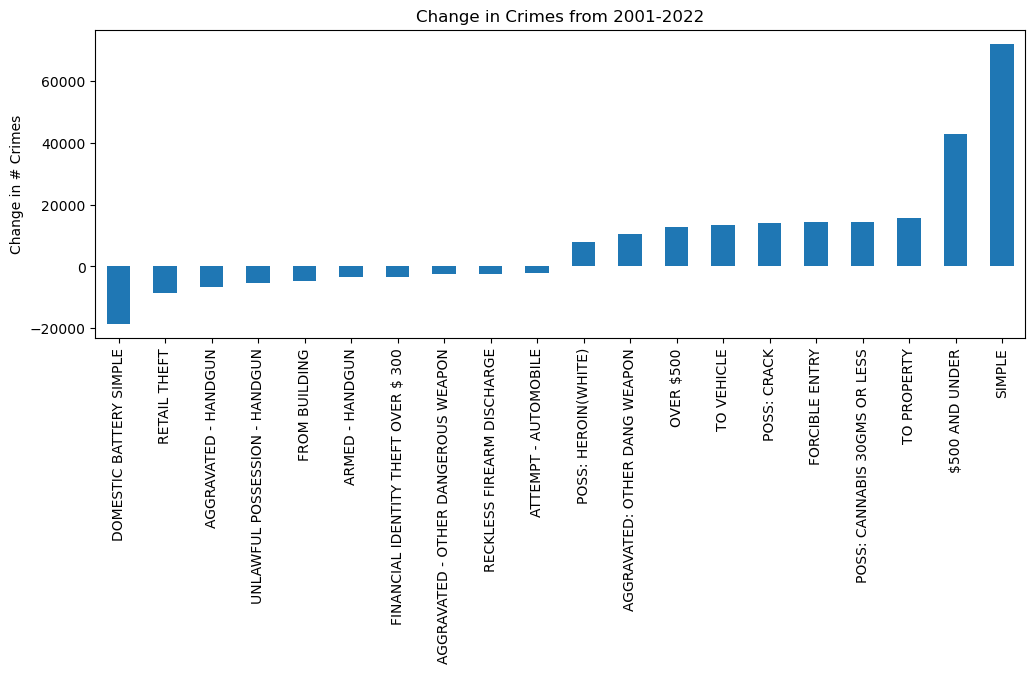

In [52]:
# Get difference in crimes over the year
delta_crimes = crimes_df_year.loc["2001-12-31"] - crimes_df_year.loc["2022-12-31"]

# Get the top20 and bottom 20 of the sorted values to plot 
top20 = delta_crimes.sort_values()[:10]
bottom20 = delta_crimes.sort_values()[-10:]

# Plot differences 
(top20.append(bottom20)).plot(kind='bar',figsize=(12,4),
                                       ylabel='Change in # Crimes',
                                       title='Change in Crimes from 2001-2022')
ax.axhline(0,color='k');

In [53]:
delta_crimes.sort_values()

DOMESTIC BATTERY SIMPLE         -18,589.00
RETAIL THEFT                     -8,714.00
AGGRAVATED - HANDGUN             -6,815.00
UNLAWFUL POSSESSION - HANDGUN    -5,445.00
FROM BUILDING                    -4,737.00
                                   ...    
FORCIBLE ENTRY                   14,279.00
POSS: CANNABIS 30GMS OR LESS     14,337.00
TO PROPERTY                      15,772.00
$500 AND UNDER                   42,937.00
SIMPLE                           72,206.00
Length: 546, dtype: float64


- Here we can see that over the years `Domestic Baterry Simple` and `Retail Theft` has gone down significantly while `%500 and Under` and `Simple` crimes has risen quite a lot. 